In [3]:
import pandas as pd

df_messy = pd.DataFrame({
    '길드원': ['전사', '법사', '도적'],
    '1월': [15, 20, 10],
    '2월': [18, 25, 12],
    '3월': [20, 30, 15]
})
print(df_messy)

  길드원  1월  2월  3월
0  전사  15  18  20
1  법사  20  25  30
2  도적  10  12  15


In [4]:
df_tidy = df_messy.melt(
    id_vars=['길드원'],
    var_name='기간',
    value_name='처치수'
)
print("\n=== [질서] Tidy Data (Long) - 기계가 좋아하는 형태 ===")
print(df_tidy)


=== [질서] Tidy Data (Long) - 기계가 좋아하는 형태 ===
  길드원  기간  처치수
0  전사  1월   15
1  법사  1월   20
2  도적  1월   10
3  전사  2월   18
4  법사  2월   25
5  도적  2월   12
6  전사  3월   20
7  법사  3월   30
8  도적  3월   15


In [5]:
df_report=df_tidy.pivot(
    index='길드원',
    columns='기간',
    values='처치수'
)
print("\n=== [회귀] 보고서용 데이터 (Wide) - 사람이 보기 좋은 형태 ===")
print(df_report)


=== [회귀] 보고서용 데이터 (Wide) - 사람이 보기 좋은 형태 ===
기간   1월  2월  3월
길드원            
도적   10  12  15
법사   20  25  30
전사   15  18  20


In [12]:
df = pd.DataFrame({
    '장비정보': ['엑스칼리버_전설_100', '나무몽둥이_일반_10', '미스릴갑옷_희귀_80'],
    '제작년도': [2020, 2021, 2022],
    '제작월': [5, 10, 1]
})

print("=== [원본] 뭉쳐있는 데이터 ===")
print(df)
#1. '_' 를 기준으로 자른다.?
# 2. exapnd=True: 잘린 조각들을 새로운 컬럼으로 확장한다
split_df = df['장비정보'].str.split('_', expand=True)
print("=== [테스트] 1단계 데이터 ===")
print(split_df)

split_df.columns = ['아이템명', '등급','내구도']
df_final = pd.concat([df, split_df], axis=1)
print("=== [테스트] 2단계 데이터 ===")
print(split_df)

print("\n=== [결과] 깔끔하게 발라낸 살코기 ===")
print(df_final[['아이템명', '등급', '내구도']])

=== [원본] 뭉쳐있는 데이터 ===
           장비정보  제작년도  제작월
0  엑스칼리버_전설_100  2020    5
1   나무몽둥이_일반_10  2021   10
2   미스릴갑옷_희귀_80  2022    1
=== [테스트] 1단계 데이터 ===
       0   1    2
0  엑스칼리버  전설  100
1  나무몽둥이  일반   10
2  미스릴갑옷  희귀   80
=== [테스트] 2단계 데이터 ===
    아이템명  등급  내구도
0  엑스칼리버  전설  100
1  나무몽둥이  일반   10
2  미스릴갑옷  희귀   80

=== [결과] 깔끔하게 발라낸 살코기 ===
    아이템명  등급  내구도
0  엑스칼리버  전설  100
1  나무몽둥이  일반   10
2  미스릴갑옷  희귀   80


In [18]:
# 년도 숫자와 합쳐서 2020-05 의 형태로 

# 제작년도 + - 제작월 -> ERROR astype(str)로 형 변환 후 합체

df_final['제작일자'] = df['제작년도'].astype(str) + '-' + df['제작월'].astype(str)

print("\n=== [결과] 날짜 포맷 완성 ===")
print(df_final[['제작일자']])


=== [결과] 날짜 포맷 완성 ===
      제작일자
0   2020-5
1  2021-10
2   2022-1


=== 결측치 현황 (%) ===
age            19.865320
embarked        0.224467
deck           77.216611
embark_town     0.224467
dtype: float64


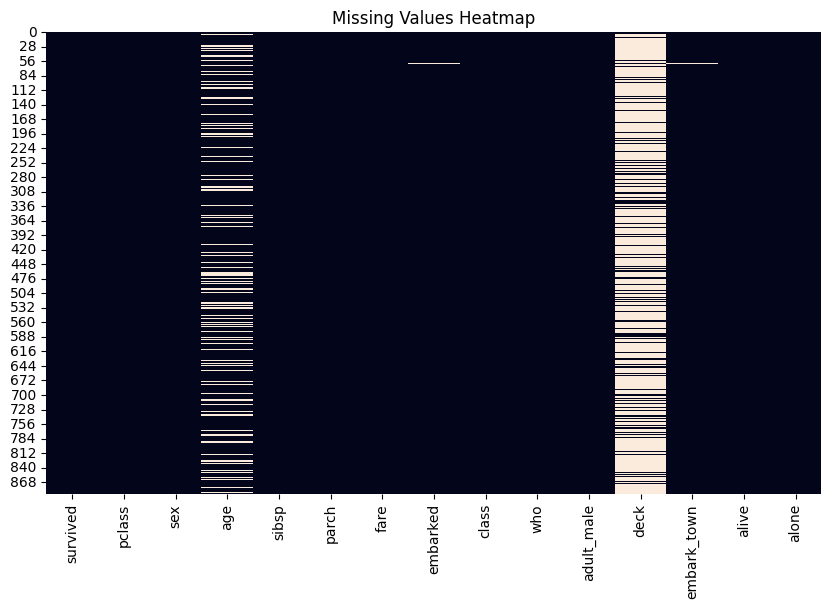

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# [상황]: 타이타닉 승객 데이터 (유명한 예제)
df = sns.load_dataset('titanic')

# [제1초식] 탐지 (Detection)
# 각 컬럼별로 결측치가 몇 개인지 세어본다.
missing_count = df.isnull().sum()
missing_ratio = df.isnull().mean() * 100 # 비율로 보는 게 더 직관적이다.

print("=== 결측치 현황 (%) ===")
print(missing_ratio[missing_ratio > 0]) # 0%인 건 안 봐도 됨

# 시각화: 결측치의 패턴을 눈으로 본다. (흰색 줄이 결측)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [23]:
df['age'] = df['age'].fillna(df.groupby('class')['age'].transform('mean'))
print(df['age'])

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: age, Length: 891, dtype: float64


C:\Users\rlaqu\AppData\Local\Temp\ipykernel_47032\1110016950.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['age'] = df['age'].fillna(df.groupby('class')['age'].transform('mean'))


In [ ]:
import pandas as pd

# [상황]: 30%가 비어있는 데이터
df = pd.DataFrame({
    '고객ID': range(1, 11),
    '최근_구매일': ['2023-01-01', np.nan, '2023-02-15', np.nan, '2023-01-20'] * 2,
    '가입일': ['2022-12-01'] * 10
})

print("=== 수정 전: 결측치 존재 ===")
print(df[['고객ID', '최근_구매일']].head())

# [비기] 깃발 꽂기 (New Feature Creation)
# 결측치이면 1, 아니면 0인 새로운 변수를 만든다.
# 이 변수는 모델에게 "이 사람은 구매 경험이 없다"는 강력한 힌트가 된다.
df['구매이력_없음'] = df['최근_구매일'].isnull().astype(int)

# [후속 처리]
# 이제 '최근_구매일'의 Null은 어떻게 할까?
# 방법 A: 모델이 트리 기반(Random Forest, XGBoost)이라면, 그냥 말도 안 되는 값(-999 등)이나 아주 먼 과거 날짜로 채워서 "특이한 값"임을 알린다.
df['최근_구매일'] = df['최근_구매일'].fillna('1900-01-01') 

print("\n=== 수정 후: 정보 보존 ===")
print(df[['고객ID', '최근_구매일', '구매이력_없음']].head())

=== 수정 전: 결측치 존재 ===
   고객ID      최근_구매일
0     1  2023-01-01
1     2         NaN
2     3  2023-02-15
3     4         NaN
4     5  2023-01-20

=== 수정 후: 정보 보존 ===
   고객ID      최근_구매일  구매이력_없음
0     1  2023-01-01        0
1     2  1900-01-01        1
2     3  2023-02-15        0
3     4  1900-01-01        1
4     5  2023-01-20        0


In [ ]:

# [상황]: 대부분 연봉 3천~5천인데, 한 명이 500억인 데이터 (오른쪽으로 꼬리가 긴 분포)
df = pd.DataFrame({'연봉': [3000, 3500, 4000, 3200, 50000000]})

# [비기 1] 로그 변환 (np.log1p는 0을 처리하기 위해 1을 더해서 로그 취함)
# 500억이라는 거대한 숫자가 얌전한 숫자로 압축된다.
df['연봉_log'] = np.log1p(df['연봉'])

print("=== 로그 변환 전후 비교 ===")
print(df)
# 결과: 모델은 이제 500억 때문에 휘둘리지 않으면서도, 그가 '가장 부자'라는 사실은 알 수 있다.

=== 로그 변환 전후 비교 ===
         연봉     연봉_log
0      3000   8.006701
1      3500   8.160804
2      4000   8.294300
3      3200   8.071219
4  50000000  17.727534


: 